# Assignment 3

Henry Vasquez, Sergio Ortega Cruz

In [1]:
#load packages
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx import algorithms
import os

### 1. Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

In [2]:
%matplotlib inline

#load dataset
data = pd.read_csv('https://raw.githubusercontent.com/hvasquez81/Data620/master/Week%203/soc-sign-bitcoinalpha.csv')
data.head()

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400


The dataset is from Stanford (https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html). The dataset analyzes users from a bitcoin trading platform called Bitcoin Alpha. Users from the platform rate other users on a scale of -10 to 10 which rates the repuation from risky (-10) to non-risky (10).

Citations below:

*S. Kumar, F. Spezzano, V.S. Subrahmanian, C. Faloutsos. Edge Weight Prediction in Weighted Signed Networks. IEEE International Conference on Data Mining (ICDM), 2016.*

*S. Kumar, B. Hooi, D. Makhija, M. Kumar, V.S. Subrahmanian, C. Faloutsos. REV2: Fraudulent User Prediction in Rating Platforms. 11th ACM International Conference on Web Searchand Data Mining (WSDM), 2018.*

### 2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

In [3]:
#start by creating a graph
graph = nx.from_pandas_edgelist(data, 'SOURCE', 'TARGET')

In [4]:
#calculate diameter
nx.diameter(graph)

NetworkXError: Found infinite path length because the graph is not connected

In [5]:
#double check if graph is connected
nx.is_connected(graph)

False

After running the built-in function to calculate the diameter of the graph and resulting in an error, the built-in is_connected function tells us that the graph is in fact not connected. This means that we cannot calculate the diameter.

In [6]:
#number of nodes
nx.number_of_nodes(graph)

3783

In [7]:
#number of edges
nx.number_of_edges(graph)

14124

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


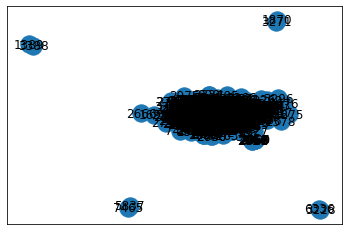

In [8]:
#draw the graph 
nx.draw_networkx(graph)

In [9]:
plt.show()

Going back to the error previously, we see a visual that shows in fact the graph is not connected. There are 5 apparent groups, possible more if we zoom into the large center grouping, meaning the diameter can not be calculated.

*https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter*

In [10]:
#find sub graphs
subs_graphs = list(nx.connected_component_subgraphs(graph))

Using the connect_component_subgraphs function from networkx, it generate graphs for each connected component of the graph defined. The function returns a list of these graphs, which we can use for further analysis.

*https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.components.connected.is_connected.html*

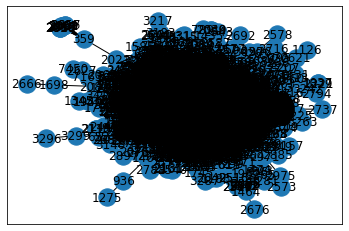

In [11]:
#show graphs
nx.draw_networkx(subs_graphs[0])
plt.show()

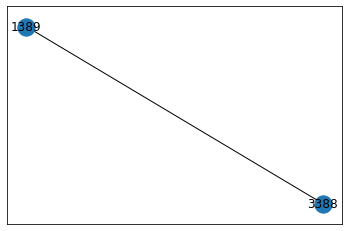

In [12]:
nx.draw_networkx(subs_graphs[1])
plt.show()

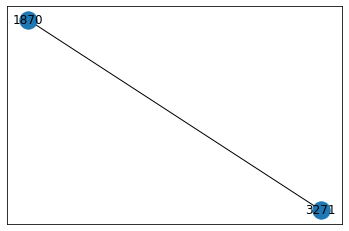

In [13]:
nx.draw_networkx(subs_graphs[2])
plt.show()

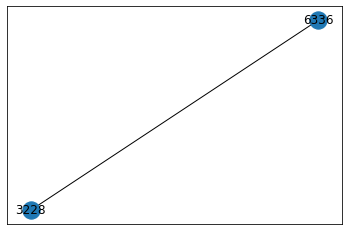

In [14]:
nx.draw_networkx(subs_graphs[3])
plt.show()

From the sub graphs, we see that the 4 outside graphs only consisted of 2 nodes each. Thus when using a visualization tool like Neo4j of Gephi, we do not need to export the sub graphs instead to focus on the main graph. We'll first go back to calculate the diamter, number of nodes and number of edges of the graph.

In [15]:
#find diameters of the subgraphs
nx.diameter(subs_graphs[0])

10

In [16]:
#number of nodes
nx.number_of_nodes(subs_graphs[0])

3775

In [17]:
#number of nodes
nx.number_of_edges(subs_graphs[0])

14120

In [18]:
#average shortest path length
algorithms.average_shortest_path_length(subs_graphs[0])

3.570840431393606

### 3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.


In [19]:
#create a gexf file to load to Gephi
cwd = os.getcwd()
nx.write_gexf(subs_graphs[0], cwd+'/assignment3_graph.gexf')

### 4. Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

Link: https://youtu.be/HOKBakbZs4c